In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Letter A
A = np.array([
    0,1,1,1,0,
    1,0,0,0,1,
    1,1,1,1,1,
    1,0,0,0,1,
    1,0,0,0,1,
    0,0,0,0,0
])

# Letter B
B = np.array([
    1,1,1,1,0,
    1,0,0,0,1,
    1,1,1,1,0,
    1,0,0,0,1,
    1,1,1,1,0,
    0,0,0,0,0
])

# Letter C
C = np.array([
    0,1,1,1,1,
    1,0,0,0,0,
    1,0,0,0,0,
    1,0,0,0,0,
    0,1,1,1,1,
    0,0,0,0,0
])

In [3]:
X = np.array([A, B, C])

y = np.array([
    [1,0,0],  # A
    [0,1,0],  # B
    [0,0,1]   # C
])

In [4]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

In [5]:
np.random.seed(42)

input_size = 30
hidden_size = 16
output_size = 3
learning_rate = 0.1
epochs = 5000

W1 = np.random.randn(input_size, hidden_size) * 0.1
b1 = np.zeros((1, hidden_size))

W2 = np.random.randn(hidden_size, output_size) * 0.1
b2 = np.zeros((1, output_size))

In [6]:
losses = []
accuracies = []

for epoch in range(epochs):
    
    # ---- Feedforward ----
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    
    z2 = np.dot(a1, W2) + b2
    output = sigmoid(z2)
    
    # ---- Loss (MSE) ----
    loss = np.mean((y - output) ** 2)
    losses.append(loss)
    
    # ---- Accuracy ----
    predictions = np.argmax(output, axis=1)
    labels = np.argmax(y, axis=1)
    accuracy = np.mean(predictions == labels)
    accuracies.append(accuracy)
    
    # ---- Backpropagation ----
    error_output = y - output
    d_output = error_output * sigmoid_derivative(output)
    
    error_hidden = d_output.dot(W2.T)
    d_hidden = error_hidden * sigmoid_derivative(a1)
    
    # ---- Weight Updates ----
    W2 += a1.T.dot(d_output) * learning_rate
    b2 += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    
    W1 += X.T.dot(d_hidden) * learning_rate
    b1 += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

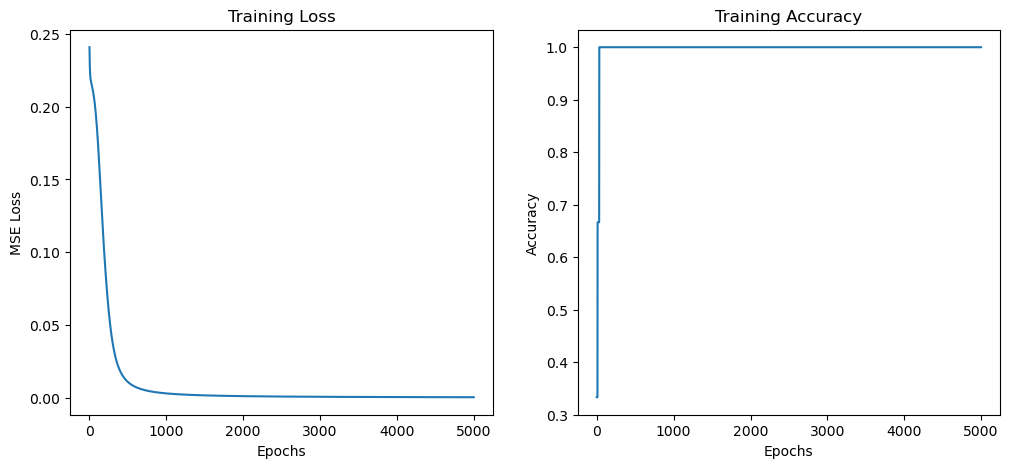

In [7]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(losses)
plt.title("Training Loss")
plt.xlabel("Epochs")
plt.ylabel("MSE Loss")

plt.subplot(1,2,2)
plt.plot(accuracies)
plt.title("Training Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")

plt.show()

In [8]:
def predict(sample):
    z1 = np.dot(sample, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    output = sigmoid(z2)
    return np.argmax(output), output

In [9]:
pred, probs = predict(A)
labels = ['A', 'B', 'C']

print("Predicted Letter:", labels[pred])
print("Output Probabilities:", probs)

Predicted Letter: A
Output Probabilities: [[0.9775728  0.01960842 0.01398461]]


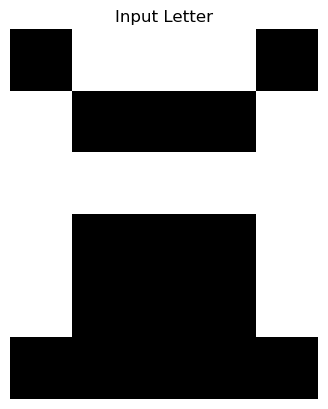

In [10]:
plt.imshow(A.reshape(6,5), cmap='gray')
plt.title("Input Letter")
plt.axis('off')
plt.show()